In [305]:
import pandas as pd
import numpy as np
import tweepy
import os
import requests
import re

# Gathering

In [145]:
# WeRateDogs Twitter archive file obtained as a csv file. Pandas dataframe created from csv file.
twitter_archive_df = pd.read_csv('twitter-archive-enhanced-2.csv')

#Using the requests package download image predictions data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [6]:
# Exploration of data in file
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
# Exploration of data types and missing data.
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [146]:
#Write image predictions data to a file 
with open(os.path.join(url.split('/')[-1]),mode = 'wb') as file:
    file.write(response.content)

In [147]:
image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [8]:
# Exploration of data in file
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
# Exploration of data types and missing fields.
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [152]:
# Authentication process to use Tweepy API
consumer_key = 'key'
consumer_secret = 'secret'
access_token = 'token'
access_secret = 'secret'

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

api = tweepy.API(auth,parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True, wait_on_rate_limit_notify = True)

In [153]:
# Creating list of tweet ids
tweet_id = twitter_archive_df['tweet_id']
list(tweet_id)

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

In [154]:
#Investigating the first tweet for information available.
tweet = api.get_status(tweet_id[0])
tweet

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]},


In [155]:
# Iterate over tweet_ids to obtain favorites and retweet count. Then append these has dicts into df_list.
df_list = []

# Any tweet_ids not found by API, are appended to e_list
e_list = []

for id in tweet_id:
    try:
        page = api.get_status(id, tweet_mode = 'extended')
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        df_list.append({'tweet_id': int(id),
                        'favorites': int(favorites),
                        'retweet_count': int(retweet_count)
                       })
        print(id, favorites, retweet_count)
    
    except Exception as e:
        e_list.append(id)

892420643555336193 35382 7472
892177421306343426 30625 5547
891815181378084864 23041 3671
891689557279858688 38673 7647
891327558926688256 36956 8247
891087950875897856 18629 2759
890971913173991426 10822 1792
890729181411237888 59619 16717
890609185150312448 25639 3814
890240255349198849 29248 6487
890006608113172480 28200 6498
889880896479866881 25659 4414
889665388333682689 44063 8858
889638837579907072 24789 3966
889531135344209921 13944 1998
889278841981685760 23147 4716
888917238123831296 26752 3976
888804989199671297 23479 3746
888554962724278272 18103 3063
888078434458587136 20005 3073
887705289381826560 27814 4783
887517139158093824 42611 10430
887473957103951883 63054 15925
887343217045368832 30936 9331
887101392804085760 28143 5280
886983233522544640 31965 6776
886736880519319552 10979 2823
886680336477933568 20664 3967
886366144734445568 19405 2805
886267009285017600 110 4
886258384151887873 25686 5605
886054160059072513 0 96
885984800019947520 29929 5950
885528943205470208

838083903487373313 17279 3027
837820167694528512 33359 7622
837482249356513284 3785 431
837471256429613056 12541 2200
837110210464448512 15727 2301
836989968035819520 12505 2242
836753516572119041 18979 4519
836677758902222849 12396 2170
836648853927522308 0 537
836397794269200385 0 26749
836380477523124226 14495 2908
836260088725786625 20915 4197
836001077879255040 18723 4150
835685285446955009 0 7922
835574547218894849 17471 3522
835536468978302976 0 1646
835309094223372289 0 20391
835297930240217089 16181 2920
835264098648616962 7583 1646
835246439529840640 2060 71
835172783151792128 25713 5618
835152434251116546 21958 2918
834931633769889797 10603 1586
834786237630337024 21046 5379
834574053763584002 13403 2457
834477809192075265 0 10378
834458053273591808 9465 1637
834209720923721728 20184 4629
834167344700198914 15554 3575
834089966724603904 9864 2082
834086379323871233 12842 2151
833863086058651648 13213 2350
833826103416520705 17788 3684
833732339549220864 0 217
833722901757046

800388270626521089 11130 2790
800188575492947969 0 3923
800141422401830912 15240 2537
800018252395122689 28287 13075
799774291445383169 0 4660
799757965289017345 8367 2157
799422933579902976 8051 1920
799308762079035393 0 5433
799297110730567681 9843 2741
799063482566066176 8052 2467
798933969379225600 13038 4427
798925684722855936 7497 1435
798705661114773508 0 6611
798701998996647937 0 7741
798697898615730177 0 6491
798694562394996736 0 4927
798686750113755136 0 2329
798682547630837760 0 4720
798673117451325440 0 5534
798665375516884993 0 3885
798644042770751489 0 1844
798628517273620480 0 1967
798585098161549313 0 5659
798576900688019456 0 5813
798340744599797760 0 3310
798209839306514432 10396 2546
797971864723324932 11552 3097
797545162159308800 14529 4852
797236660651966464 19903 6535
797165961484890113 225 26
796904159865868288 0 8878
796865951799083009 7665 1910
796759840936919040 11785 3013
796563435802726400 0 7211
796484825502875648 7558 1746
796387464403357696 10966 4113
79

761371037149827077 0 17709
761334018830917632 5115 1426
761292947749015552 4413 1065
761227390836215808 5246 1531
761004547850530816 11156 3412
760893934457552897 3753 950
760656994973933572 6482 1871
760641137271070720 4901 1271
760539183865880579 7443 3549
760521673607086080 4144 1367
760290219849637889 26377 11245
760252756032651264 3892 853
760190180481531904 5594 1756
760153949710192640 0 30
759943073749200896 5859 2035
759923798737051648 14464 5528
759846353224826880 6630 1927
759793422261743616 5855 1868
759557299618865152 4610 1167
759447681597108224 8345 2410
759446261539934208 1643 475
759197388317847553 5985 1909
759159934323924993 0 1131
759099523532779520 14272 4067
759047813560868866 6382 1965
758854675097526272 3494 879


Rate limit reached. Sleeping for: 193


758828659922702336 11023 3768
758740312047005698 5645 1582
758474966123810816 3734 982
758467244762497024 4715 2172
758405701903519748 5123 1871
758355060040593408 3333 1037
758099635764359168 18715 9757
758041019896193024 2648 364
757741869644341248 6761 3183
757729163776290825 0 7725
757725642876129280 4464 1186
757611664640446465 4483 1082
757597904299253760 0 294
757596066325864448 4258 1033
757400162377592832 14869 6693
757393109802180609 5709 1695
757354760399941633 4442 1387
756998049151549440 6174 1943
756939218950160384 6520 1958
756651752796094464 4956 1266
756526248105566208 10226 3499
756303284449767430 3863 1085
756288534030475264 43247 17294
756275833623502848 6291 1503
755955933503782912 7172 2816
755206590534418437 16153 5233
755110668769038337 20815 10858
754874841593970688 0 7716
754856583969079297 6779 2457
754747087846248448 2539 507
754482103782404096 5192 1909
754449512966619136 3675 720
754120377874386944 7751 2302
753655901052166144 5740 2128
753420520834629632 

718613305783398402 2360 463
718540630683709445 2373 975
718460005985447936 2617 507
718454725339934721 4717 1461
718246886998687744 1850 479
718234618122661888 3752 956
717841801130979328 2380 580
717790033953034240 2784 1065
717537687239008257 5601 1779
717428917016076293 1570 431
717421804990701568 3061 811
717047459982213120 6095 1858
717009362452090881 3139 927
716802964044845056 4155 1132
716791146589110272 7953 1520
716730379797970944 1198 414
716447146686459905 12658 5648
716439118184652801 2317 202
716285507865542656 2688 1012
716080869887381504 6572 1837
715928423106027520 3094 850
715758151270801409 3604 1379
715733265223708672 4532 1632
715704790270025728 2693 551
715696743237730304 3792 1252
715680795826982913 4162 1555
715360349751484417 5306 1510
715342466308784130 2958 666
715220193576927233 2352 625
715200624753819648 4988 1803
715009755312439296 4017 1181
714982300363173890 3608 1000
714962719905021952 7125 4104
714957620017307648 4020 1363
714631576617938945 3182 958


693644216740769793 1315 119
693642232151285760 2470 398
693629975228977152 2382 771
693622659251335168 1498 361
693590843962331137 4910 1893
693582294167244802 1602 238
693486665285931008 1725 613
693280720173801472 3262 1203
693267061318012928 2317 790
693262851218264065 2150 482
693231807727280129 2795 719
693155686491000832 7680 3115
693109034023534592 1664 591
693095443459342336 1807 442
692919143163629568 2609 731
692905862751522816 2357 845
692901601640583168 1711 583
692894228850999298 2203 769
692828166163931137 2796 862
692752401762250755 6622 3529
692568918515392513 4239 1483
692535307825213440 3070 1317
692530551048294401 1782 399
692423280028966913 1436 220
692417313023332352 9126 3353
692187005137076224 2467 789
692158366030913536 2092 764
692142790915014657 1606 379
692041934689402880 3310 1226
692017291282812928 2813 925
691820333922455552 3860 1598
691793053716221953 7928 4097
691756958957883396 2764 962
691675652215414786 1901 493
691483041324204033 2325 543
6914597094

678446151570427904 3865 1462
678424312106393600 5278 2433
678410210315247616 4050 1723
678399652199309312 77305 30486
678396796259975168 1541 397
678389028614488064 1798 402
678380236862578688 2345 864
678341075375947776 1666 511
678334497360859136 1252 236
678278586130948096 11007 5835
678255464182861824 1532 349
678023323247357953 1842 362
678021115718029313 13112 6043
677961670166224897 3292 1611
677918531514703872 1288 388
677895101218201600 4626 1975
677716515794329600 2932 937
677700003327029250 3261 1384
677698403548192770 1185 306
677687604918272002 2405 804
677673981332312066 3203 1436
677662372920729601 1873 903
677644091929329666 1787 771
677573743309385728 2052 669
677565715327688705 1253 438
677557565589463040 2357 1103
677547928504967168 6665 3502
677530072887205888 1027 218
677335745548390400 2925 1678
677334615166730240 1291 270
677331501395156992 1045 224
677328882937298944 3514 1434
677314812125323265 1583 510
677301033169788928 1181 385
677269281705472000 1897 674
67

Rate limit reached. Sleeping for: 242


677187300187611136 2618 871
676975532580409345 2654 1018
676957860086095872 2148 772
676949632774234114 1253 375
676948236477857792 2064 819
676946864479084545 1664 348
676942428000112642 1986 711
676936541936185344 12220 4720
676916996760600576 2852 1723
676897532954456065 2154 693
676864501615042560 2002 668
676821958043033607 21945 14793
676819651066732545 1742 632
676811746707918848 1371 407
676776431406465024 4793 1931
676617503762681856 2758 909
676613908052996102 1036 191
676606785097199616 1816 413
676603393314578432 1111 363
676593408224403456 4373 2049
676590572941893632 879 116
676588346097852417 2206 743
676582956622721024 1142 261
676575501977128964 2465 1063
676533798876651520 1801 521
676496375194980353 1463 508
676470639084101634 11126 4447
676440007570247681 1653 627
676430933382295552 1340 321
676263575653122048 1997 513
676237365392908289 1153 268
676219687039057920 73218 29475
676215927814406144 1658 546
676191832485810177 2181 983
676146341966438401 1842 631
676121

670780561024270336 745 267
670778058496974848 314 69
670764103623966721 1020 391
670755717859713024 412 98
670733412878163972 900 474
670727704916926465 784 329
670717338665226240 1115 445
670704688707301377 726 345
670691627984359425 554 223
670679630144274432 706 259
670676092097810432 230 38
670668383499735048 10019 4619
670474236058800128 1418 686
670468609693655041 337 82
670465786746662913 913 505
670452855871037440 516 189
670449342516494336 1134 601
670444955656130560 6331 1844
670442337873600512 608 186
670435821946826752 995 478
670434127938719744 1330 598
670433248821026816 312 103
670428280563085312 1305 572
670427002554466305 493 148
670421925039075328 1230 591
670420569653809152 579 291
670417414769758208 538 302
670411370698022913 1893 825
670408998013820928 523 204
670403879788544000 403 141
670385711116361728 527 191
670374371102445568 704 250
670361874861563904 310 60
670338931251150849 401 101
670319130621435904 3664 1131
670303360680108032 409 121
670290420111441920

In [156]:
# Explore of first 5 tweets to ensure iteration has worked correctly
df_list[:5]

[{'tweet_id': 892420643555336193, 'favorites': 35382, 'retweet_count': 7472},
 {'tweet_id': 892177421306343426, 'favorites': 30625, 'retweet_count': 5547},
 {'tweet_id': 891815181378084864, 'favorites': 23041, 'retweet_count': 3671},
 {'tweet_id': 891689557279858688, 'favorites': 38673, 'retweet_count': 7647},
 {'tweet_id': 891327558926688256, 'favorites': 36956, 'retweet_count': 8247}]

In [157]:
# With the data collected, create a pandas dataframe
json_tweets_df = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweet_count'])

In [158]:
# Save a copy of the data to a txt file for future reference as requested by the project
json_tweets_df.to_csv('tweet_json.txt',encoding='utf-8',index=False)

In [159]:
# Created a csv file in order to download and open without issues in Excel for visual inspection
json_tweets_df.to_csv('tweet_json.csv',encoding='utf-8',index=False)
json_tweets_df.head()

,tweet_id,favorites,retweet_count
0,892420643555336193,35382,7472
1,892177421306343426,30625,5547
2,891815181378084864,23041,3671
3,891689557279858688,38673,7647
4,891327558926688256,36956,8247


In [160]:
json_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2331 non-null   int64
 1   favorites      2331 non-null   int64
 2   retweet_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [199]:
# Programmatical sampling on each of the dataframes
twitter_archive_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
145,863553081350529029,NaN,NaN,2017-05-14 00:34:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Neptune. He's a backpup vocalist for the Dixie Chicks. 13/10 (vid by @AmiWinehouse) https://t.co/tordvmaaop,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863553081350529029/video/1,13,10,Neptune,None,None,None,None
831,768609597686943744,NaN,NaN,2016-08-25 00:43:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lou. His sweater is too small and he already cut the tags off. Very very churlish. 10/10 would still pet https://t.co/dZPMLresEr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768609597686943744/photo/1,10,10,Lou,None,None,None,None
1490,692901601640583168,NaN,NaN,2016-01-29 02:46:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Fuck the system"" 10/10 https://t.co/N0OADmCnVV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/692901601640583168/photo/1,10,10,None,None,None,None,None
2006,672267570918129665,NaN,NaN,2015-12-03 04:14:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you accidentally open up the front facing camera. 10/10 https://t.co/jDXxZARQIZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672267570918129665/photo/1,10,10,None,None,None,None,None
1284,708479650088034305,NaN,NaN,2016-03-12 02:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Bear. He's a Beneboop Cumberclap. Extremely unamused. 13/10 I'm in love with this picture https://t.co/uC8kUqAz0W,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708479650088034305/photo/1,13,10,Bear,None,None,None,None
2015,672205392827572224,NaN,NaN,2015-12-03 00:07:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Opal. He's a Royal John Coctostan. Ready for transport. Basically indestructible. 9/10 good pupper https://t.co/yRBQF9OS7D,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672205392827572224/photo/1,9,10,Opal,None,None,pupper,None
1687,681579835668455424,NaN,NaN,2015-12-28 20:57:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Apollo. He thought you weren't coming back so he had a mental breakdown. 8/10 we've all been there https://t.co/ojUBrDCHLT,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681579835668455424/photo/1,8,10,Apollo,None,None,None,None
2099,670717338665226240,NaN,NaN,2015-11-28 21:34:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",*screams for a little bit and then crumples to the floor shaking* 12/10 https://t.co/W2MCt9pTed,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670717338665226240/photo/1,12,10,None,None,None,None,None
990,748705597323898880,NaN,NaN,2016-07-01 02:31:39 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",#BarkWeek is getting rather heckin terrifying over here. Doin me quite the spooken. 13/10 (vid by @corgi_zero) https://t.co/eA7k1ZQslA,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748705597323898880/video/1,13,10,None,None,None,None,None
1883,674805413498527744,NaN,NaN,2015-12-10 04:18:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When your entire life is crumbling before you and you're trying really hard to hold your shit together.\n10/10 https://t.co/vqFkgYPCW8,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674805413498527744/video/1,10,10,None,None,None,None,None


In [26]:
image_predictions_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1842,838476387338051585,https://pbs.twimg.com/media/C6Ld0wYWgAQQqMC.jpg,3,Great_Pyrenees,0.997692,True,kuvasz,0.001001,True,Newfoundland,0.000405,True
1822,834786237630337024,https://pbs.twimg.com/media/C5XBp19WYAA5a_v.jpg,1,Border_terrier,0.156276,True,Norwegian_elkhound,0.125912,True,Boston_bull,0.096624,True
1043,712668654853337088,https://pbs.twimg.com/media/CePoVTyWsAQEz1g.jpg,1,Labrador_retriever,0.829058,True,golden_retriever,0.038664,True,Chihuahua,0.026221,True
1305,753375668877008896,https://pbs.twimg.com/media/CnSHLFeWgAAwV-I.jpg,1,bluetick,0.360071,True,crutch,0.134816,False,tripod,0.098207,False
312,671547767500775424,https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg,2,Loafer,0.255088,False,platypus,0.090019,False,cowboy_boot,0.066536,False
623,680583894916304897,https://pbs.twimg.com/media/CXHrcFYWcAEE5_L.jpg,1,tub,0.889801,False,bathtub,0.032351,False,hippopotamus,0.014177,False
1990,873213775632977920,https://pbs.twimg.com/media/DB5HTBGXUAE0TiK.jpg,1,vizsla,0.619782,True,bloodhound,0.338069,True,Chesapeake_Bay_retriever,0.012676,True
306,671528761649688577,https://pbs.twimg.com/media/CVG_2I-WIAASKSS.jpg,1,Doberman,0.782626,True,black-and-tan_coonhound,0.109678,True,Gordon_setter,0.052110,True
423,674053186244734976,https://pbs.twimg.com/media/CVq3zAaWwAA8vpk.jpg,1,Cardigan,0.984725,True,Pembroke,0.008730,True,kelpie,0.002195,True
874,698178924120031232,https://pbs.twimg.com/media/CbBuBhbWwAEGH29.jpg,1,Chesapeake_Bay_retriever,0.351868,True,malinois,0.207753,True,Labrador_retriever,0.154606,True


In [163]:
json_tweets_df.sample(10)

,tweet_id,favorites,retweet_count
1050,739844404073074688,3707,833
581,798682547630837760,0,4720
1637,683030066213818368,2110,719
499,810984652412424192,5305,1429
354,828650029636317184,9379,1309
270,839239871831150596,26508,6321
1487,691416866452082688,18813,7397
813,768193404517830656,10716,3479
1942,673342308415348736,1200,534
1968,672609152938721280,1041,360


In [28]:
twitter_archive_df.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Baron        1
Gabby        1
Ridley       1
Combo        1
Jed          1
Name: name, Length: 957, dtype: int64

In [29]:
twitter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [30]:
twitter_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [31]:
twitter_archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Assessing the Data

Below is a list of issues found that need cleaning.

Quality (completeness, validity, accuracy, and consistency issues)
- "twitter_archive_df" has 2356 rows while the "image_predictions_df" has only 2075 rows, probably due to retweets and missing photos.
- "twitter_archive_df" contains 181 retweets and 78 replies which not needed.
- there are some tweets without an image, so will be cleaned.
- there are many names of dogs which are clearly incorrect such as 'a', 'actually', 'all'
- Shorten data in source column by using regex library
- timestamp column has  unnecessary intger "+0000".
- change timestamp column to datetime format.
- source data column is not clear.
- not all the data are in their most appropriate data type.

Tidiness (structural issues)
- there are 3 dataframes, only 1 dataframe should suffice to incorporate the data we need (merging).
- there are 4 columns for doggo, floffer, pupper, and puppo in the "twitter_archive_df" but this is same categorical data that would be better in only 1 column (melting).

# Cleaning the Data

In [264]:
# Creat a copy of the original 3 datasets for reference
archive_clean_df = twitter_archive_df.copy()
image_clean_df = image_predictions_df.copy()
json_clean_df = json_tweets_df.copy()

In [265]:
# Save a copy of the clean datasets to work with
archive_clean_df.to_csv('archive_clean.csv',encoding='utf-8',index=False)
image_clean_df.to_csv('image_clean.csv',encoding='utf-8',index=False)
json_clean_df.to_csv('json_clean.csv',encoding='utf-8',index=False)

In [266]:
# Load clean datasets
archive_clean_df = pd.read_csv('archive_clean.csv')
image_clean_df = pd.read_csv('image_clean.csv')
json_clean_df = pd.read_csv('json_clean.csv')

# Tidiness

### 1) Merge the 3 dataframes into 1 master dataframe

In [267]:
# Merge the three DataFrames into one master DataFrame, starting first with archive_clean and json_clean
first_archive_master_df = pd.merge(archive_clean_df, json_clean_df, on=['tweet_id','tweet_id'],how='left')

In [268]:
# Check merge went as anticipated
first_archive_master_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,35382.0,7472.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,30625.0,5547.0


In [269]:
# Merge new master with image_clean
first_archive_master_df = pd.merge(first_archive_master_df, image_clean_df, on='tweet_id',how='left')

In [270]:
# Check merge went as anticipated
first_archive_master_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorites,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,35382.0,7472.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,30625.0,5547.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [271]:
# Check twitter_archive_master_df
first_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [272]:
# Save a copy of the newly created master dataframe has a starting point for cleaning
first_archive_master_df.to_csv('first_archive_master.csv',encoding='utf-8',index=False)

In [273]:
df = pd.read_csv('first_archive_master.csv')

### 2) Melt the 4 categorical dog types 'doggo', 'floofer', 'pupper', and 'puppo' into 1 column 'dog_type'

In [274]:
# Check how many dog types there are of each
df['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [275]:
df['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [276]:
df['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [277]:
df['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [278]:
# Create list of columns for copying and pasting with melt function
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'favorites', 'retweet_count', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [279]:
# Melt the 4 columns into a column'types' to be deleted and a value'dog_type'column to keep.
df = pd.melt(df, 
        id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id','timestamp', 'source', 'text','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorites', 'retweet_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'], 
        value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
        var_name = 'types', value_name = 'dog_type')

In [280]:
# Check the dataframe structure after melting. We should have 4 copies of each tweet_id, one for each dog type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    9424 non-null   int64  
 1   in_reply_to_status_id       312 non-null    float64
 2   in_reply_to_user_id         312 non-null    float64
 3   timestamp                   9424 non-null   object 
 4   source                      9424 non-null   object 
 5   text                        9424 non-null   object 
 6   retweeted_status_id         724 non-null    float64
 7   retweeted_status_user_id    724 non-null    float64
 8   retweeted_status_timestamp  724 non-null    object 
 9   expanded_urls               9188 non-null   object 
 10  rating_numerator            9424 non-null   int64  
 11  rating_denominator          9424 non-null   int64  
 12  name                        9424 non-null   object 
 13  favorites                   9324 

In [281]:
# Check we still have all our dog types
df.dog_type.value_counts()

None       9030
pupper      257
doggo        97
puppo        30
floofer      10
Name: dog_type, dtype: int64

# Quality

### 1) Remove Retweets and Replies

In [282]:
# there are 181 retweets, which can be seen in the 3 columns "retweeted_status_id", "retweeted_status_user_id" and 
# "retweeted_status_timestamp". We keep the rows that are null and remove the retweets.
df = df[df.retweeted_status_id.isnull()]

In [283]:
# check retweets have gone
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8700 entries, 0 to 9423
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    8700 non-null   int64  
 1   in_reply_to_status_id       312 non-null    float64
 2   in_reply_to_user_id         312 non-null    float64
 3   timestamp                   8700 non-null   object 
 4   source                      8700 non-null   object 
 5   text                        8700 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               8468 non-null   object 
 10  rating_numerator            8700 non-null   int64  
 11  rating_denominator          8700 non-null   int64  
 12  name                        8700 non-null   object 
 13  favorites                   8672 

In [284]:
# delete the columns related to retweets from the master dataframe.
df = df.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

In [285]:
# check the retweet columns have gone.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8700 entries, 0 to 9423
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               8700 non-null   int64  
 1   in_reply_to_status_id  312 non-null    float64
 2   in_reply_to_user_id    312 non-null    float64
 3   timestamp              8700 non-null   object 
 4   source                 8700 non-null   object 
 5   text                   8700 non-null   object 
 6   expanded_urls          8468 non-null   object 
 7   rating_numerator       8700 non-null   int64  
 8   rating_denominator     8700 non-null   int64  
 9   name                   8700 non-null   object 
 10  favorites              8672 non-null   float64
 11  retweet_count          8672 non-null   float64
 12  jpg_url                7976 non-null   object 
 13  img_num                7976 non-null   float64
 14  p1                     7976 non-null   object 
 15  p1_c

In [286]:
# View the state of the dataframe
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,types,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,35382.0,7472.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,doggo,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,30625.0,5547.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,doggo,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,23041.0,3671.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,38673.0,7647.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,doggo,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,36956.0,8247.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,doggo,None


In [287]:
# the "in_reply_to_status_id" includes the original tweet_id if there is a reply. There are 78 replies.
# We keep the rows that are null and remove the replies.
df = df[df.in_reply_to_status_id.isnull()]

In [288]:
# check the replies have gone
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8388 entries, 0 to 9423
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               8388 non-null   int64  
 1   in_reply_to_status_id  0 non-null      float64
 2   in_reply_to_user_id    0 non-null      float64
 3   timestamp              8388 non-null   object 
 4   source                 8388 non-null   object 
 5   text                   8388 non-null   object 
 6   expanded_urls          8376 non-null   object 
 7   rating_numerator       8388 non-null   int64  
 8   rating_denominator     8388 non-null   int64  
 9   name                   8388 non-null   object 
 10  favorites              8360 non-null   float64
 11  retweet_count          8360 non-null   float64
 12  jpg_url                7884 non-null   object 
 13  img_num                7884 non-null   float64
 14  p1                     7884 non-null   object 
 15  p1_c

In [289]:
# delete the columns related to replies from the master dataframe.
df = df.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)

In [290]:
# check the replies columns have gone.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8388 entries, 0 to 9423
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            8388 non-null   int64  
 1   timestamp           8388 non-null   object 
 2   source              8388 non-null   object 
 3   text                8388 non-null   object 
 4   expanded_urls       8376 non-null   object 
 5   rating_numerator    8388 non-null   int64  
 6   rating_denominator  8388 non-null   int64  
 7   name                8388 non-null   object 
 8   favorites           8360 non-null   float64
 9   retweet_count       8360 non-null   float64
 10  jpg_url             7884 non-null   object 
 11  img_num             7884 non-null   float64
 12  p1                  7884 non-null   object 
 13  p1_conf             7884 non-null   float64
 14  p1_dog              7884 non-null   object 
 15  p2                  7884 non-null   object 
 16  p2_con

In [291]:
# View the state of the dataframe
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,types,dog_type
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,35382.0,7472.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,doggo,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,30625.0,5547.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,doggo,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,23041.0,3671.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,doggo,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,38673.0,7647.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,doggo,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,36956.0,8247.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,doggo,None


### 2)Remove some tweets without image.

In [292]:
# 126 tweets without an image, as this was one of the project's
# requirements we will delete the tweets without an image. This time we will keep the rows with an image.
df = df[df.jpg_url.notnull()]

In [293]:
# Check that we have an image for each tweet_id
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7884 entries, 0 to 9423
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            7884 non-null   int64  
 1   timestamp           7884 non-null   object 
 2   source              7884 non-null   object 
 3   text                7884 non-null   object 
 4   expanded_urls       7884 non-null   object 
 5   rating_numerator    7884 non-null   int64  
 6   rating_denominator  7884 non-null   int64  
 7   name                7884 non-null   object 
 8   favorites           7856 non-null   float64
 9   retweet_count       7856 non-null   float64
 10  jpg_url             7884 non-null   object 
 11  img_num             7884 non-null   float64
 12  p1                  7884 non-null   object 
 13  p1_conf             7884 non-null   float64
 14  p1_dog              7884 non-null   object 
 15  p2                  7884 non-null   object 
 16  p2_con

### 3) Sort the dataframe by dog type.

In [294]:
# Sort the dataframe by dog type so that we can drop the 3 duplicates that don't contain a dog type.
df = df.sort_values('dog_type').drop_duplicates('tweet_id', keep = 'last')

In [297]:
df.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,types,dog_type
3607,710997087345876993,2016-03-19 01:11:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Milo and Amos. They are the best of pals. Both 12/10 would pet at the same time https://t.co/Mv37BHEyyD,https://twitter.com/dog_rates/status/710997087345876993/photo/1,12,10,Milo,4440.0,1336.0,https://pbs.twimg.com/media/Cd34FClUMAAnvGP.jpg,1.0,malamute,0.281260,True,Eskimo_dog,0.232641,True,Pembroke,0.091602,True,floofer,None
3009,792050063153438720,2016-10-28 17:07:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Remus. He's a mop that came to life. Can't see anything. Constantly trips over himself. Still a very good dog. 11/10 https://t.co/S3f1SYylzu,"https://twitter.com/dog_rates/status/792050063153438720/photo/1,https://twitter.com/dog_rates/status/792050063153438720/photo/1",11,10,Remus,7127.0,1782.0,https://pbs.twimg.com/media/Cv3tU38WcAASFas.jpg,2.0,komondor,0.942856,True,swab,0.052715,False,Tibetan_terrier,0.002743,True,floofer,None
4540,668988183816871936,2015-11-24 03:03:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Honor to rate this dog. Lots of fur on him. Two massive tumors on back. Should get checked out. Very neat tho. 7/10 https://t.co/bMhs18elNF,https://twitter.com/dog_rates/status/668988183816871936/photo/1,7,10,None,845.0,426.0,https://pbs.twimg.com/media/CUi5M7TXIAAY0gj.jpg,1.0,Arabian_camel,0.999614,False,bison,0.000228,False,llama,0.000067,False,floofer,None
2245,667885044254572545,2015-11-21 01:59:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Stu. Stu has stacks on stacks and an eye made of pure gold. 10/10 pay for my tuition pls https://t.co/7rkYZQdKEd,https://twitter.com/dog_rates/status/667885044254572545/photo/1,10,10,Stu,773.0,431.0,https://pbs.twimg.com/media/CUTN5V4XAAAIa4R.jpg,1.0,malamute,0.088530,True,golden_retriever,0.087499,True,muzzle,0.075008,False,doggo,None
4221,675354435921575936,2015-12-11 16:40:19 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Everyone needs to watch this. 13/10 https://t.co/Bb3xnpsWBC,https://twitter.com/dog_rates/status/675354435921575936/video/1,13,10,None,30911.0,15827.0,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1.0,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True,floofer,None
2706,831552930092285952,2017-02-14 17:17:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dutch. He dressed up as his favorite emoji for Valentine's Day. I've got heart eyes for his heart eyes. 13/10 https://t.co/BCbmFYLrse,https://twitter.com/dog_rates/status/831552930092285952/photo/1,13,10,Dutch,8838.0,2269.0,https://pbs.twimg.com/media/C4pE-I0WQAABveu.jpg,1.0,Chihuahua,0.257415,True,Pembroke,0.161442,True,French_bulldog,0.092143,True,floofer,None
3071,783839966405230592,2016-10-06 01:23:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Riley. His owner put a donut pillow around him and he loves it so much he won't let anyone take it off. 13/10 https://t.co/8TCQcsZCZ8,"https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1",13,10,Riley,29819.0,10684.0,https://pbs.twimg.com/media/CuDCSM-XEAAJw1W.jpg,1.0,quilt,0.333739,False,Siamese_cat,0.136245,False,three-toed_sloth,0.117464,False,floofer,None
4065,680609293079592961,2015-12-26 04:41:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Thi

### 4) Change dog names in names column for clearly correct data

In [296]:

# Check the list of dog names.
list(df['name'])

['Biden',
 'None',
 'None',
 'None',
 'Cupcake',
 'Reese',
 'a',
 'None',
 'Philippe',
 'Hall',
 'None',
 'Dook',
 'Fwed',
 'None',
 'Frank',
 'a',
 'Kial',
 'George',
 'None',
 'None',
 'Olive',
 'Calvin',
 'a',
 'None',
 'None',
 'None',
 'Naphaniel',
 'None',
 'Genevieve',
 'Joshwa',
 'a',
 'None',
 'Jockson',
 'Jeph',
 'None',
 'None',
 'None',
 'a',
 'Carll',
 'Klevin',
 'None',
 'Keet',
 'None',
 'Dave',
 'Clybe',
 'Gabe',
 'None',
 'Pipsy',
 'Bradlay',
 'Churlie',
 'Kenneth',
 'Clarence',
 'None',
 'a',
 'Timison',
 'None',
 'None',
 'Filup',
 'None',
 'a',
 'Shaggy',
 'Josep',
 'None',
 'Tedrick',
 'Stu',
 'Erik',
 'Cleopatricia',
 'None',
 'Otis',
 'Jiminy',
 'None',
 'Alfie',
 'None',
 'a',
 'Lugan',
 'a',
 'Christoper',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'an',
 'a',
 'an',
 'None',
 'None',
 'None',
 'None',
 'None',
 'a',
 'quite',
 'Walter',
 'None',
 'None',
 'None',
 'None',
 'None',
 'Scout',
 'Kreggory',
 'Jimothy',
 'None',
 'None

In [298]:
# We see all incorrect names have their first letter has lowercase. We will use this to change them into 'None'. 
names=[]

#function iterates through name column checking if the first letter is lowercase.
def incorrect_name(row):
    if row['name'][0].islower() == True:
        names.append('None')
    else:
        names.append(row['name'])
        
# call function using pandas apply by columns
df.apply(incorrect_name, axis=1)


#add names list to master dataframe and check dataframe
df['names'] = names
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,types,dog_type,names
2279,667405339315146752,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7,10,Biden,433.0,206.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1.0,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,doggo,None,Biden
2278,667435689202614272,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12,10,None,286.0,79.0,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1.0,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,doggo,None,None
2277,667437278097252352,2015-11-19 20:20:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,https://twitter.com/dog_rates/status/667437278097252352/photo/1,10,10,None,420.0,217.0,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1.0,porcupine,0.989154,False,bath_towel,0.006300,False,badger,0.000966,False,doggo,None,None
2276,667443425659232256,2015-11-19 20:44:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,https://twitter.com/dog_rates/status/667443425659232256/photo/1,6,10,None,725.0,534.0,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1.0,goose,0.980815,False,drake,0.006918,False,hen,0.005255,False,doggo,None,None
2275,667453023279554560,2015-11-19 21:22:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,https://twitter.com/dog_rates/status/667453023279554560/photo/1,11,10,Cupcake,291.0,81.0,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1.0,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True,doggo,None,Cupcake


In [299]:
# print a list to check only names are present
df['names'].unique()


array(['Biden', 'None', 'Cupcake', 'Reese', 'Philippe', 'Hall', 'Dook',
       'Fwed', 'Frank', 'Kial', 'George', 'Olive', 'Calvin', 'Naphaniel',
       'Genevieve', 'Joshwa', 'Jockson', 'Jeph', 'Carll', 'Klevin',
       'Keet', 'Dave', 'Clybe', 'Gabe', 'Pipsy', 'Bradlay', 'Churlie',
       'Kenneth', 'Clarence', 'Timison', 'Filup', 'Shaggy', 'Josep',
       'Tedrick', 'Stu', 'Erik', 'Cleopatricia', 'Otis', 'Jiminy',
       'Alfie', 'Lugan', 'Christoper', 'Walter', 'Scout', 'Kreggory',
       'Jimothy', 'Phineas', 'Cash', 'Nugget', 'Goose', 'Venti',
       'Benedict', 'Nelly', 'Dante', 'Penny', 'Aja', 'Emmy', 'Shadow',
       'Beau', 'Derek', 'Mingus', 'Maya', 'Canela', 'Jeffrey', 'Gerald',
       'Ralphus', 'Zeke', 'Jim', 'Oliver', 'Ted', 'Bruno', 'Koda', 'Zoey',
       'Jax', 'Franklin', 'Darla', 'Archie', 'Tilly', 'Waffles', 'Jimbo',
       'Steven', 'Jack', 'Duddles', 'Bailey', 'Romeo', 'Jesse', 'Bella',
       'Louis', 'Elliot', 'Gary', 'Rey', 'Koko', 'Alfy', 'Stanley',
       'Ru

In [300]:
# update original name column
df['name'] = df['names']

In [302]:
# delete names column
df = df.drop('names', axis=1)

In [303]:
# check name column is updated correctly.
df['name'].value_counts()

None       622
Charlie     11
Lucy        10
Oliver      10
Cooper      10
          ... 
Jersey       1
Butters      1
Mary         1
Chubbs       1
Edgar        1
Name: name, Length: 913, dtype: int64

### 5) Shorten data in source column by using regex library

In [306]:

# Use re library with findall function and extract real source from tags > ...... <
df['source'] = df['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

In [311]:
# Check extracted correct information
df['source'].value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

### 6) Remove unnecessary numbers from timestamp column

In [313]:
# Strip +0000 from timestamp column
df.timestamp = df.timestamp.str.strip('+0000')

### 7) change timestamp column to datetime format.

In [314]:
# Convert data type to datetime
df.timestamp = pd.to_datetime(df.timestamp)

In [315]:
# Check the changes have been made
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 2279 to 8029
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   int64         
 1   timestamp           1971 non-null   datetime64[ns]
 2   source              1971 non-null   object        
 3   text                1971 non-null   object        
 4   expanded_urls       1971 non-null   object        
 5   rating_numerator    1971 non-null   int64         
 6   rating_denominator  1971 non-null   int64         
 7   name                1971 non-null   object        
 8   favorites           1964 non-null   float64       
 9   retweet_count       1964 non-null   float64       
 10  jpg_url             1971 non-null   object        
 11  img_num             1971 non-null   float64       
 12  p1                  1971 non-null   object        
 13  p1_conf             1971 non-null   float64  

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,types,dog_type
2279,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7,10,Biden,433.0,206.0,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1.0,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,doggo,None
2278,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12,10,None,286.0,79.0,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1.0,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,doggo,None
2277,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,https://twitter.com/dog_rates/status/667437278097252352/photo/1,10,10,None,420.0,217.0,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1.0,porcupine,0.989154,False,bath_towel,0.006300,False,badger,0.000966,False,doggo,None
2276,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,https://twitter.com/dog_rates/status/667443425659232256/photo/1,6,10,None,725.0,534.0,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1.0,goose,0.980815,False,drake,0.006918,False,hen,0.005255,False,doggo,None
2275,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,https://twitter.com/dog_rates/status/667453023279554560/photo/1,11,10,Cupcake,291.0,81.0,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1.0,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True,doggo,None


### 8) Convert each column to its most appropriate data type

In [319]:
df=df[df.favorites.notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 2279 to 8029
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1964 non-null   object        
 1   timestamp           1964 non-null   datetime64[ns]
 2   source              1964 non-null   category      
 3   text                1964 non-null   object        
 4   expanded_urls       1964 non-null   object        
 5   rating_numerator    1964 non-null   int64         
 6   rating_denominator  1964 non-null   int64         
 7   name                1964 non-null   object        
 8   favorites           1964 non-null   float64       
 9   retweet_count       1964 non-null   float64       
 10  jpg_url             1964 non-null   object        
 11  img_num             1964 non-null   float64       
 12  p1                  1964 non-null   object        
 13  p1_conf             1964 non-null   float64  

In [320]:
# Convert data types to most suitable data type and round confidence to 2 decimal places to make easier to read
df['tweet_id'] = df['tweet_id'].astype(object)
df['source'] = df['source'].astype('category')
df['favorites'] = df['favorites'].astype(int)
df['retweet_count'] = df['retweet_count'].astype(int)
df['dog_type'] = df['dog_type'].astype('category')

In [321]:
# Check conversion of data types and confidence is now 2 decimal places
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 2279 to 8029
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1964 non-null   object        
 1   timestamp           1964 non-null   datetime64[ns]
 2   source              1964 non-null   category      
 3   text                1964 non-null   object        
 4   expanded_urls       1964 non-null   object        
 5   rating_numerator    1964 non-null   int64         
 6   rating_denominator  1964 non-null   int64         
 7   name                1964 non-null   object        
 8   favorites           1964 non-null   int32         
 9   retweet_count       1964 non-null   int32         
 10  jpg_url             1964 non-null   object        
 11  img_num             1964 non-null   float64       
 12  p1                  1964 non-null   object        
 13  p1_conf             1964 non-null   float64  

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,types,dog_type
2279,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7,10,Biden,433,206,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1.0,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,doggo,None
2278,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12,10,None,286,79,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1.0,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,doggo,None
2277,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,https://twitter.com/dog_rates/status/667437278097252352/photo/1,10,10,None,420,217,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1.0,porcupine,0.989154,False,bath_towel,0.006300,False,badger,0.000966,False,doggo,None
2276,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,https://twitter.com/dog_rates/status/667443425659232256/photo/1,6,10,None,725,534,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1.0,goose,0.980815,False,drake,0.006918,False,hen,0.005255,False,doggo,None
2275,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,https://twitter.com/dog_rates/status/667453023279554560/photo/1,11,10,Cupcake,291,81,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1.0,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True,doggo,None


In [322]:
# Save a copy of the dataframe to csv for future reference
df.to_csv('twitter_archive_master.csv', encoding='utf-8',index=False)

In [323]:
df_clean = pd.read_csv('twitter_archive_master.csv')

In [324]:
df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,types,dog_type
0,667405339315146752,2015-11-19 18:13:27,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1,https://twitter.com/dog_rates/status/667405339315146752/photo/1,7,10,Biden,433,206,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,1.0,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,doggo,None
1,667435689202614272,2015-11-19 20:14:03,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689202614272/photo/1,12,10,None,286,79,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1.0,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,doggo,None
2,667437278097252352,2015-11-19 20:20:22,Twitter for iPhone,Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx,https://twitter.com/dog_rates/status/667437278097252352/photo/1,10,10,None,420,217,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1.0,porcupine,0.989154,False,bath_towel,0.006300,False,badger,0.000966,False,doggo,None
3,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N,https://twitter.com/dog_rates/status/667443425659232256/photo/1,6,10,None,725,534,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1.0,goose,0.980815,False,drake,0.006918,False,hen,0.005255,False,doggo,None
4,667453023279554560,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa,https://twitter.com/dog_rates/status/667453023279554560/photo/1,11,10,Cupcake,291,81,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1.0,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True,doggo,None


# Analyzing the Data

In [338]:
# Import visualization libraries
import matplotlib.pyplot as plt
# 'Magic word' so that your visualizations are plotted
%matplotlib inline

In [326]:
# Quick analysis of some of the numbers 
df_clean.describe()

,tweet_id,rating_numerator,rating_denominator,favorites,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1.964000e+03,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1.964000e+03,1.964000e+03
mean,7.358154e+17,12.223014,10.479124,8140.168534,2400.277495,1.202138,0.593928,1.346393e-01,6.028936e-02
std,6.744191e+16,41.708155,6.865424,11973.685598,4289.830947,0.559615,0.272134,1.009430e-01,5.096697e-02
min,6.660209e+17,0.000000,2.000000,69.000000,11.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758399e+17,10.000000,10.000000,1745.750000,534.750000,1.000000,0.362775,5.352722e-02,1.619708e-02
50%,7.087246e+17,11.000000,10.000000,3673.500000,1161.000000,1.000000,0.587357,1.173995e-01,4.947920e-02
75%,7.877408e+17,12.000000,10.000000,10159.000000,2742.000000,1.000000,0.847062,1.955617e-01,9.162278e-02
max,8.924206e+17,1776.000000,170.000000,152489.000000,75465.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


From the WeRateDogs Twitter account we can obtain quickly some initial information to start with:

We can answer the following questions:
Which breeds are most tweeted about?
Which breeds obtain the highest ratings? 
Which breeds receive most likes?

In [332]:
# Which breeds are most tweeted
df_clean.dog_type.value_counts()

None       1662
pupper      209
doggo        62
puppo        23
floofer       8
Name: dog_type, dtype: int64

#### so pupper is the most tweeted dog breed!

In [334]:
##Which breeds obtain the highest ratings?
df_clean.loc[df_clean.rating_numerator.max()].dog_type

'pupper'

#### so still pupper getting the highest rating!

Text(0.5, 1.0, 'Most liked breeds')

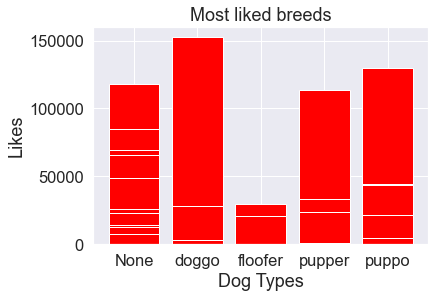

In [344]:
# Plot a bar chart
plt.bar(df_clean.dog_type, df_clean.favorites, color= 'red')
plt.xlabel("Dog Types")
plt.ylabel("Likes")
plt.title("Most liked breeds")


#### from chart we can see the doggo breed type has the most likes!